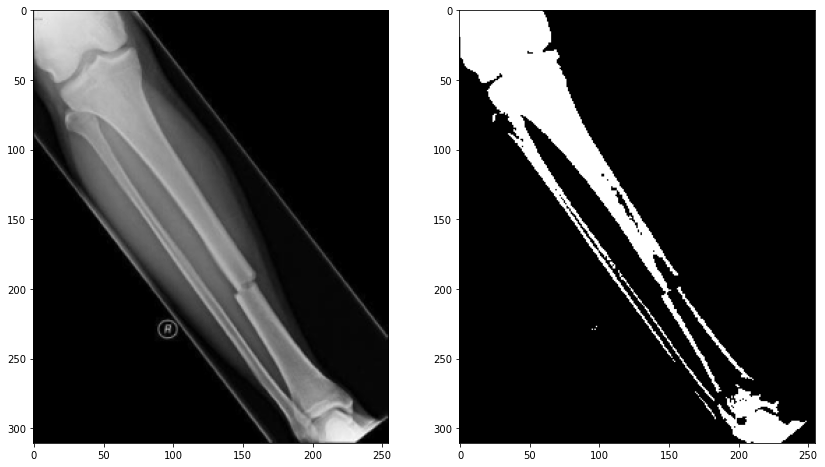

In [18]:
#task1

import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r'F:\Uni Work\CV Lab\Lab 6\2x\img1.png', cv2.IMREAD_GRAYSCALE)

_, binary_mask = cv2.threshold(image, 135, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')


plt.subplot(1, 2, 2)
plt.imshow(binary_mask, cmap='gray')
plt.show()

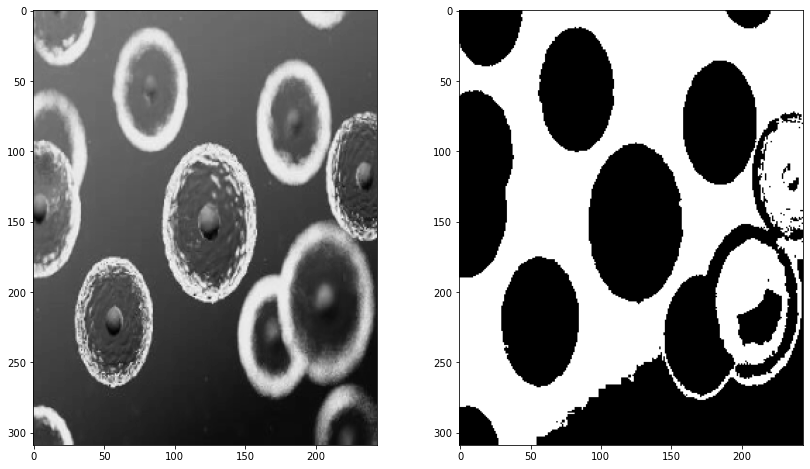

In [77]:
import numpy as np

image = cv2.imread(r'F:\Uni Work\CV Lab\Lab 6\2x\img2.png', cv2.IMREAD_GRAYSCALE)

seed_point = (100, 100)

def region_growing(image, seed, threshold):
    mask = np.zeros_like(image, dtype = np.uint8)
    stack = [seed]
    seed_intensity = image[seed]
    
    while stack:
        x, y = stack.pop()
        if x < 0 or x >= image.shape[0] or y < 0 or y >= image.shape[1]:
            continue
            
        if mask[x, y] == 0:
            if abs(int(image[x, y]) - int(seed_intensity)) < threshold:
                mask[x, y] = 255
                stack.extend([(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)])
    return mask

threshold = 50
segmented_image = region_growing(image, seed_point, threshold)


# cv2.imshow('Image', segmented_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.show()

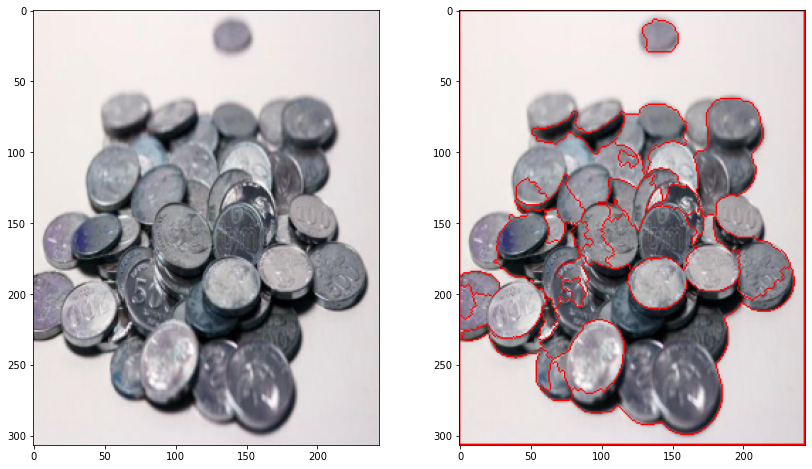

In [48]:
#task3

image = cv2.imread(r'F:\Uni Work\CV Lab\Lab 6\2x\img3.png')
image_org = cv2.imread(r'F:\Uni Work\CV Lab\Lab 6\2x\img3.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.25 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown == 255] = 0

cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.imshow(image_org)

plt.subplot(1, 2, 2)
plt.imshow(image)
plt.show()

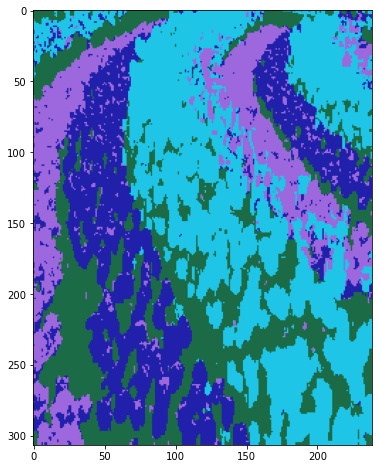

In [55]:
#task4

image = cv2.imread(r'F:\Uni Work\CV Lab\Lab 6\2x\img4.png')

pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

K = 4
_, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 50, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

cv2.imshow('Image', segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(14, 8))
plt.imshow(segmented_image)
plt.show()